# Predictive Modeling: Customer Churn Prediction

## Objective
Build machine learning models to predict which customers will churn based on the features we engineered.

## Models We'll Build
1. **Logistic Regression** - Simple, interpretable baseline
2. **Random Forest** - More complex, captures non-linear patterns

## Success Metrics
- **Accuracy** - Overall correctness
- **Precision** - Of predicted churners, how many actually churned?
- **Recall** - Of actual churners, how many did we catch?
- **F1-Score** - Balance between precision and recall

---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load processed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()


In [3]:
X_train.shape


(5634, 26)

In [4]:
X_test.shape

(1409, 26)

In [5]:
X_train.shape[1]

26

## Step 1: Feature Scaling
Normalize numerical features so all values are on similar scales.
This helps Logistic Regression perform better.

In [6]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [7]:

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test data using same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [8]:
X_train[numerical_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,0.102371,-0.521976,-0.262257
1,-0.711743,0.337478,-0.503635
2,-0.793155,-0.809013,-0.749883
3,-0.263980,0.284384,-0.172722
4,-1.281624,-0.676279,-0.989374


In [9]:
X_train[numerical_cols].mean()

tenure           -1.008935e-17
MonthlyCharges   -2.402527e-16
TotalCharges      2.522338e-17
dtype: float64

In [10]:
X_train[numerical_cols].std()

tenure            1.000089
MonthlyCharges    1.000089
TotalCharges      1.000089
dtype: float64

## Model 1: Logistic Regression
Simple baseline model that learns linear patterns.

In [11]:
# Train Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Calculate metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

print("Logistic Regression Results:")
print("Accuracy:", log_accuracy)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1-Score:", log_f1)

Logistic Regression Results:
Accuracy: 0.8041163946061036
Precision: 0.6540880503144654
Recall: 0.5561497326203209
F1-Score: 0.6011560693641619


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## MODEL 2: Random Forest Classifier

In [13]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)



Random Forest Results:
Accuracy: 0.7885024840312278
Precision: 0.6266666666666667
Recall: 0.5026737967914439
F1-Score: 0.5578635014836796


## Model Comparison
Compare both models to see which performs better.

In [14]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_accuracy, rf_accuracy],
    'Precision': [log_precision, rf_precision],
    'Recall': [log_recall, rf_recall],
    'F1-Score': [log_f1, rf_f1]
})

print("\nModel Comparison:")
print(results)



Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.804116   0.654088  0.556150  0.601156
1        Random Forest  0.788502   0.626667  0.502674  0.557864


## Performance Visualization
Visual comparison of both models across all metrics.

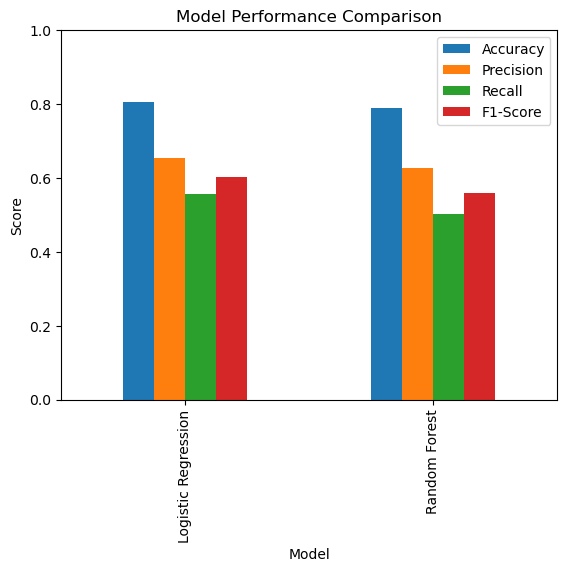

In [16]:
import matplotlib.pyplot as plt

# Plot comparison
results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


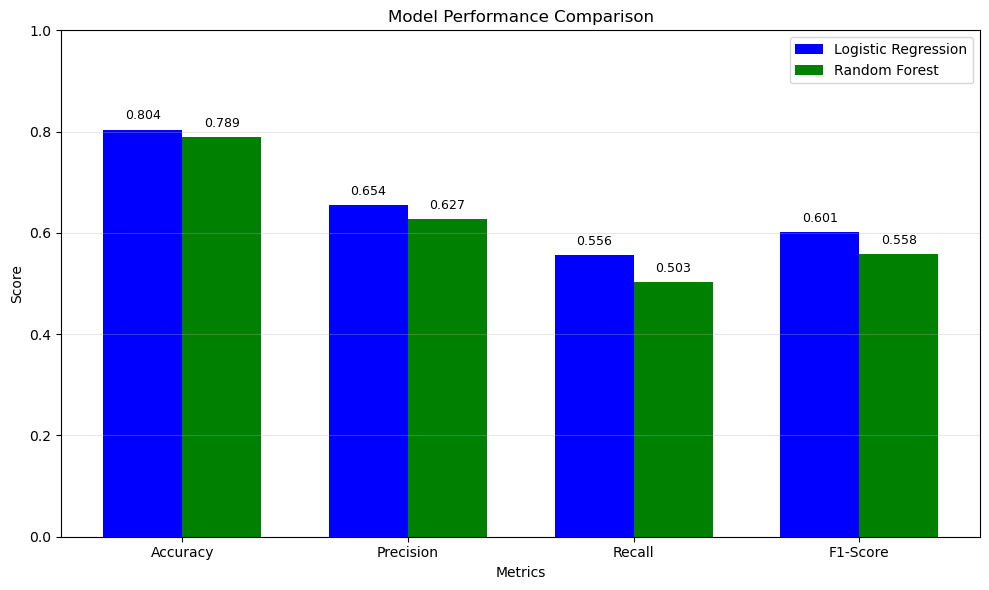

In [20]:
# Visualize comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
log_scores = [log_accuracy, log_precision, log_recall, log_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], log_scores, width, label='Logistic Regression', color='blue')
plt.bar([i + width/2 for i in x], rf_scores, width, label='Random Forest', color='green')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (log_val, rf_val) in enumerate(zip(log_scores, rf_scores)):
    plt.text(i - width/2, log_val + 0.02, round(log_val, 3), ha='center', fontsize=9)
    plt.text(i + width/2, rf_val + 0.02, round(rf_val, 3), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## Feature Importance
Which features matter most for predicting churn?

In [21]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance.head(10))

Top 10 Most Important Features:
                           Feature  Importance
15                    TotalCharges    0.186055
14                  MonthlyCharges    0.172559
4                           tenure    0.151939
19         Contract_Month-to-month    0.063273
17     InternetService_Fiber optic    0.035429
24  PaymentMethod_Electronic check    0.031986
0                           gender    0.028622
13                PaperlessBilling    0.026381
21               Contract_Two year    0.024459
2                          Partner    0.023018


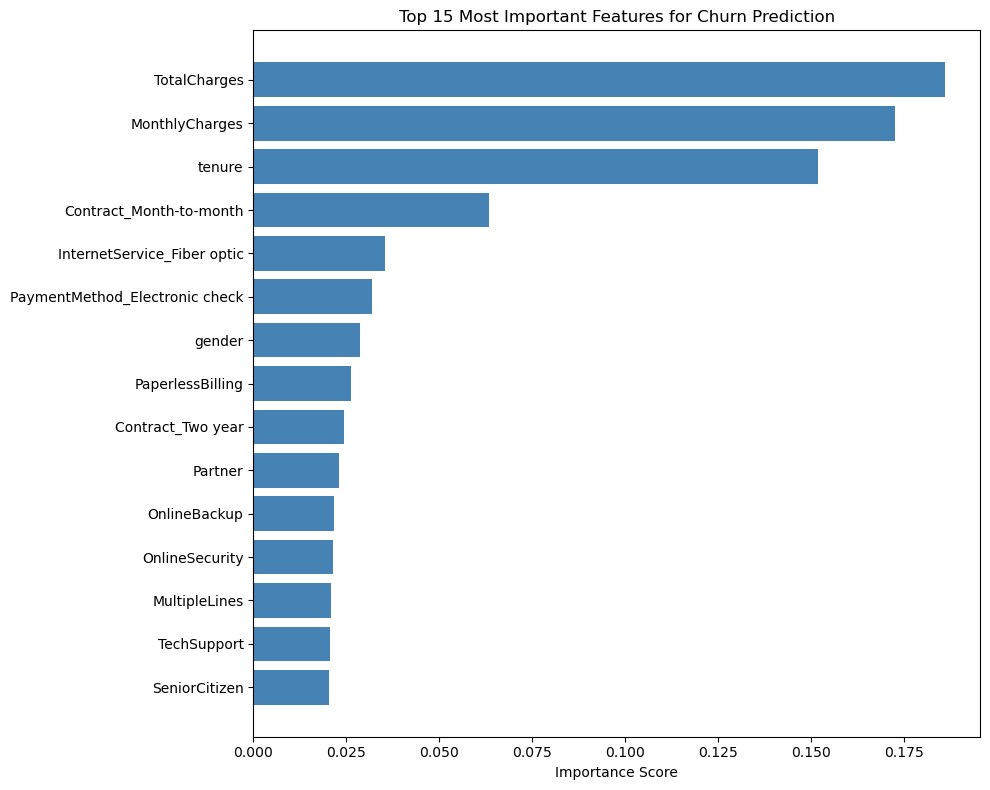

In [22]:
# Visualize top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Top 15 Most Important Features for Churn Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Confusion Matrix
Visualize where the model makes correct predictions vs mistakes.

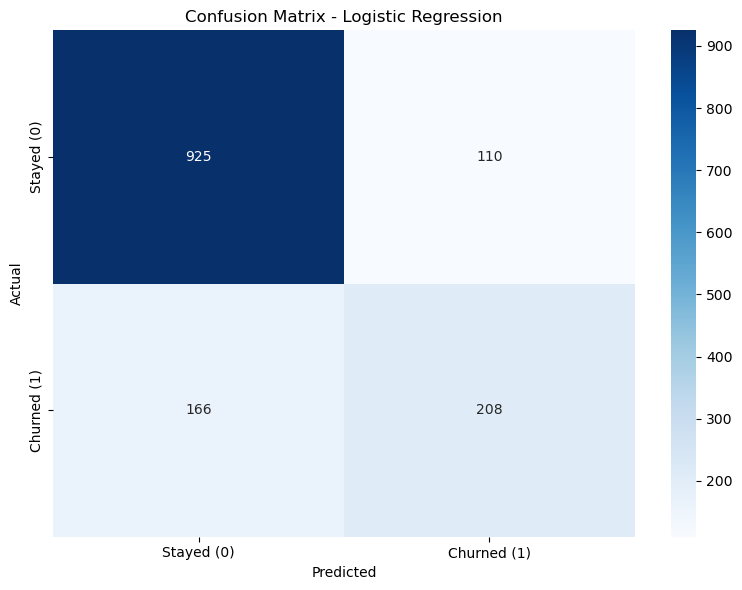


Breakdown:
True Negatives (Correctly predicted stayed): 925
False Positives (Predicted churn, actually stayed): 110
False Negatives (Predicted stay, actually churned): 166
True Positives (Correctly predicted churn): 208


In [24]:
# Create confusion matrix for Logistic Regression (our best model)
cm = confusion_matrix(y_test, y_pred_log)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stayed (0)', 'Churned (1)'],
            yticklabels=['Stayed (0)', 'Churned (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

# Print breakdown
print("\nBreakdown:")
print("True Negatives (Correctly predicted stayed):", cm[0,0])
print("False Positives (Predicted churn, actually stayed):", cm[0,1])
print("False Negatives (Predicted stay, actually churned):", cm[1,0])
print("True Positives (Correctly predicted churn):", cm[1,1])

## Summary and Conclusions

### Model Performance
- **Best Model:** Logistic Regression
- **Accuracy:** 80.4%
- **Can identify 56% of churners before they leave**

### Top Predictive Features
1. **TotalCharges** (18.6%) - Lifetime customer value
2. **MonthlyCharges** (17.3%) - Monthly payment amount
3. **Tenure** (15.2%) - Customer loyalty/age
4. **Contract Type** (6.3%) - Month-to-month vs annual
5. **Internet Service Type** (3.5%) - Fiber optic users
6. **Payment Method** (3.2%) - Electronic check users

### Business Recommendations
Based on model insights, focus retention efforts on:

**High-Risk Profile:**
- New customers (low tenure)
- High monthly/total charges
- Month-to-month contracts
- Electronic check payment
- Fiber optic internet users

**Retention Strategy:**
1. **Proactive outreach** to customers matching high-risk profile
2. **Contract upgrade offers** for month-to-month customers
3. **Payment method migration** from electronic check to autopay
4. **Pricing review** for high-charge customers
5. **First-year engagement program** for new customers

### Model Limitations
- Recall is 55.6% - missing 44% of churners
- Could improve with:
  - More data
  - Additional features (customer service interactions, usage patterns)
  - Model tuning
  - Ensemble methods

### Next Steps
- Deploy model to score all customers monthly
- Create churn risk dashboard
- A/B test retention campaigns on high-risk customers
- Monitor and retrain model quarterly